In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/aachen_model.csv')

/storage/internal/home/r-pueblas/.conda/envs/passion-dev/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (1,4,5,9,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dataset.head()

,Unnamed: 0,ST_AsText_1,ST_AsText_2,ST_SRID_1,Within,normal,area,tilt,azimuth,center,lon,lat,capacity,flat,elev,group,ID,poa,generation,gen
0,217008,"POLYGON Z ((293727.27 5628870.318 193.661,2937...",NaN,25832.0,True,[ 0. -0. 1.],45.969333,32.0,180.0,"[(293728.858683662, 5628871.637373464)]",6.074272,50.774872,2.442626,True,300.0,S2,217008.0,1.293567e+06,2426.687024,NaN
1,217013,"POLYGON Z ((293152.73 5628244.806 200.56,29315...",NaN,25832.0,True,[0. 0. 1.],36.064949,32.0,180.0,"[(293157.8567467185, 5628243.828399268)]",6.066537,50.769030,1.916347,True,300.0,S2,217013.0,1.291059e+06,1900.208815,NaN
2,217014,"POLYGON Z ((293338.797 5628376.212 209.549,293...",NaN,25832.0,True,[ 0. -0. 1.],84.837309,32.0,180.0,"[(293333.1229463291, 5628372.518758716)]",6.068947,50.770248,4.507915,True,300.0,S2,217014.0,1.291719e+06,4472.235407,NaN
3,217015,"POLYGON Z ((293953.597 5628904.371 175.672,293...",NaN,25832.0,True,[0. 0. 1.],15.082291,32.0,180.0,"[(293956.34312867903, 5628904.182674101)]",6.077476,50.775245,0.801413,True,300.0,S2,217015.0,1.293886e+06,796.370705,NaN
4,217016,"POLYGON Z ((293033.69 5628972.298 224.45,29303...",NaN,25832.0,True,[ 0. -0. 1.],20.620000,32.0,180.0,"[(293035.99658036133, 5628969.486089646)]",6.064403,50.775504,1.095664,True,300.0,S2,217016.0,1.293108e+06,1088.118841,NaN


In [4]:
dataset = dataset[dataset.ST_AsText_1.notnull()]

array([[<AxesSubplot:title={'center':'tilt'}>]], dtype=object)

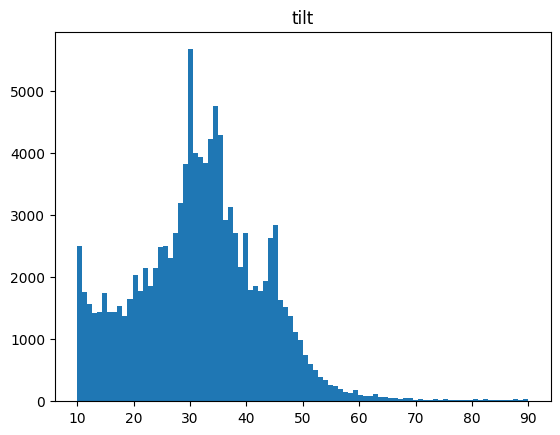

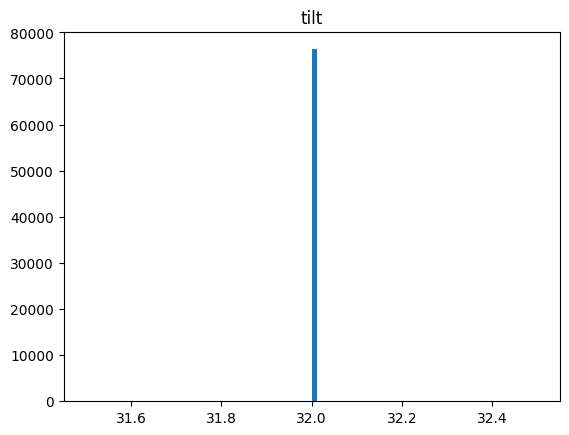

In [5]:
# Tilted rooftops
dataset_tilted = dataset[dataset.flat == False]
dataset_flat = dataset[dataset.flat == True]

dataset_tilted.hist(column='tilt', grid=False, bins=90)
dataset_flat.hist(column='tilt', grid=False, bins=90)

# Tests to check if it makes sense to discretize the data

In [6]:
from math import sqrt, sin, pi, asin

def angle_to_proportion(angle, b):
    rads = angle * pi / 180
    a_c = sin(rads)
    
    c = b / sin((90-angle) * pi / 180)
    
    a = a_c * c
    
    return a
def proportion_to_angle(a, b):
    c = sqrt(a**2+b**2)
    rads = asin(a/c)
    angle = rads * 180 / pi
    
    return angle

# Angle in degrees for a 1/10 proportion
a = 10
b = 100
c = sqrt(a**2+b**2)
angle = asin(a/c) * 180 / pi
print(angle)

5.710593137499642


array([[<AxesSubplot:title={'center':'tilt'}>]], dtype=object)

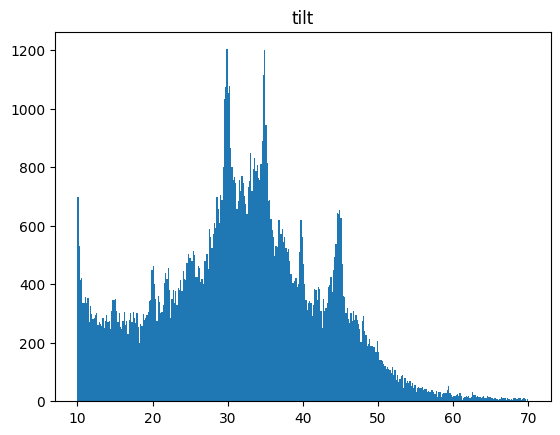

In [7]:
dataset_tilted[dataset_tilted.tilt < 70].hist(column='tilt', grid=False, bins=360)

In [8]:
angles = []
for i in range(1,301):
    a = i
    b = 100
    c = sqrt(a**2+b**2)
    angle = asin(a/c) * 180 / pi
    angles.append(angle)

/tmp/ipykernel_175273/2393756235.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  select_tilts = dataset_tilted[dataset_tilted.tilt < max_value][dataset_tilted.tilt > min_value]


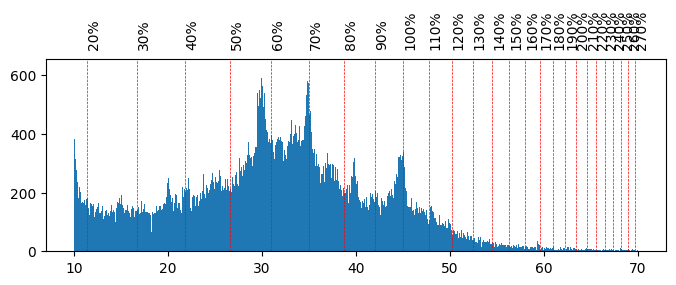

In [9]:
min_value = 10
max_value = 70

fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))
fig.suptitle('')

select_tilts = dataset_tilted[dataset_tilted.tilt < max_value][dataset_tilted.tilt > min_value]

ax.hist(select_tilts.tilt, bins=720)

filtered_angles = filter(lambda angle: angle >= min_value and angle <=max_value, angles)
filtered_angles = filter(lambda angle: round(angle_to_proportion(angle, 100)) % 10 == 0, filtered_angles)
for angle in filtered_angles:
    ax.axvline(x=angle, color='r', linestyle='dashed', linewidth=0.5)
    ax.text(angle,700,str(round(angle_to_proportion(angle, 100)))+'%',rotation=90)

plt.show()

In [10]:
angles_12 = []
for i in range(1,13):
    angle = proportion_to_angle(i, 12)
    print(angle)
    angles_12.append(angle)

4.763641690726178
9.462322208025618
14.03624346792648
18.43494882292201
22.619864948040426
26.56505117707799
30.256437163529274
33.69006752597979
36.86989764584402
39.8055710922652
42.510447078000844
45.00000000000001


/tmp/ipykernel_175273/318432541.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  select_tilts = dataset_tilted[dataset_tilted.tilt < max_value][dataset_tilted.tilt > min_value]


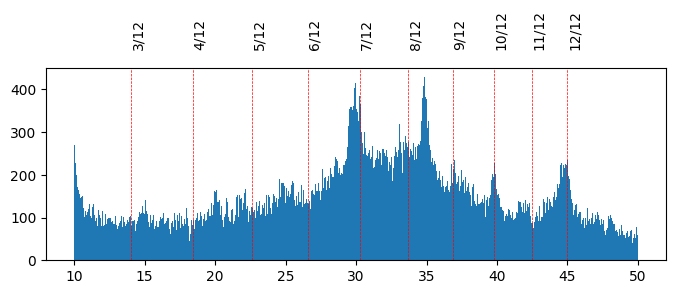

In [11]:
min_value = 10
max_value = 50

fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))
fig.suptitle('')

select_tilts = dataset_tilted[dataset_tilted.tilt < max_value][dataset_tilted.tilt > min_value]

ax.hist(select_tilts.tilt, bins=720)

filtered_angles = filter(lambda angle: angle >= min_value and angle <=max_value, angles_12)
#filtered_angles = filter(lambda angle: round(angle_to_proportion(angle, 100)) % 10 == 0, filtered_angles)
for angle in filtered_angles:
    ax.axvline(x=angle, color='r', linestyle='dashed', linewidth=0.5)
    ax.text(angle,500,str(round(angle_to_proportion(angle, 12)))+'/12',rotation=90)

plt.show()

/tmp/ipykernel_175273/375611433.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  select_tilts = dataset_tilted[dataset_tilted.tilt < max_value][dataset_tilted.tilt > min_value]


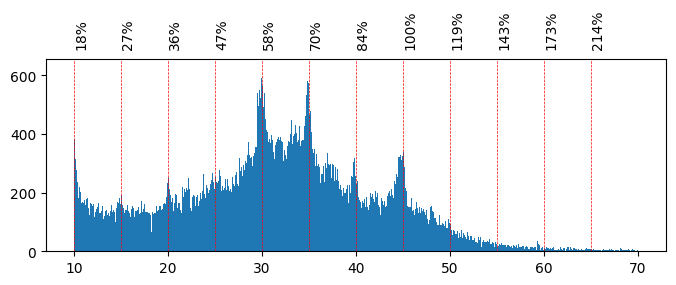

In [12]:
min_value = 10
max_value = 70

fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))
fig.suptitle('')

select_tilts = dataset_tilted[dataset_tilted.tilt < max_value][dataset_tilted.tilt > min_value]

ax.hist(select_tilts.tilt, bins=720)

filtered_angles = range(10,70,5)
for angle in filtered_angles:
    ax.axvline(x=angle, color='r', linestyle='dashed', linewidth=0.5)
    ax.text(angle,700,str(round(angle_to_proportion(angle, 100)))+'%',rotation=90)

plt.show()

# Method 1: fit a normal distribution

In [13]:
from scipy import stats
from scipy.stats import norm

/tmp/ipykernel_175273/239378035.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = dataset_tilted[dataset_tilted.tilt < 90][dataset_tilted.tilt > 0].tilt


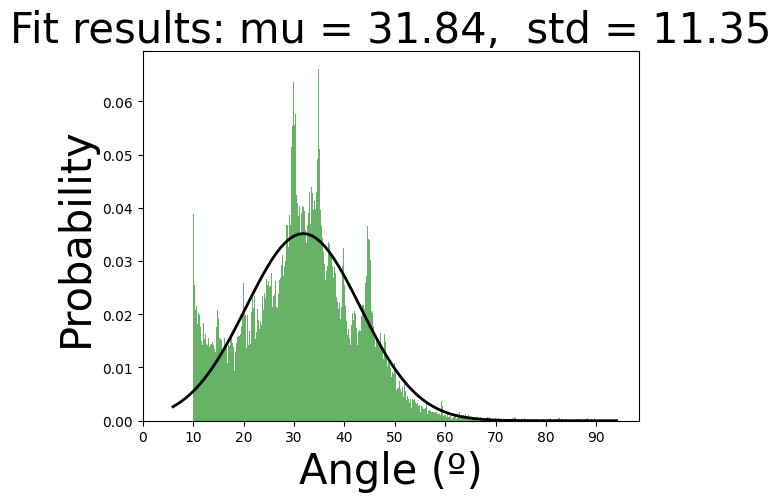

In [14]:
# Generate some data for this demonstration.
data = dataset_tilted[dataset_tilted.tilt < 90][dataset_tilted.tilt > 0].tilt

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=700, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title, size=30)
plt.ylabel('Probability', size=30)
plt.xlabel('Angle (º)', size=30)
plt.xticks(np.arange(0, 100, 10))

#plt.savefig('aachen-normal-distribution.png')
plt.show()

# Method 2: KDE

/tmp/ipykernel_175273/3503007366.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = dataset_tilted[dataset_tilted.tilt < 90][dataset_tilted.tilt > 0].tilt


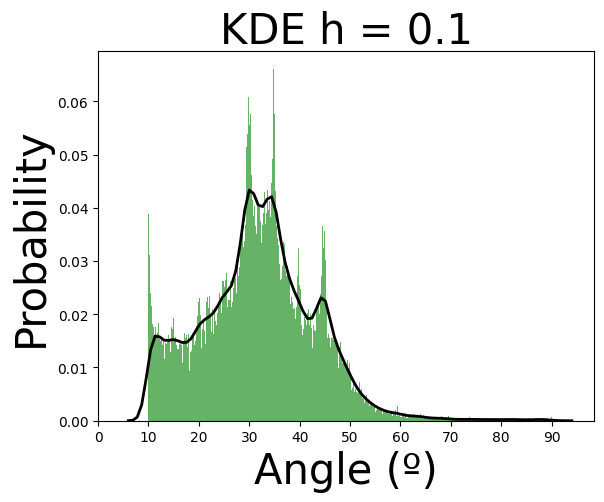

[[27.95533994 25.05921826 30.46143655 32.27380249 30.60018026 13.08842172
  37.10963733 21.29945615 44.95887359 38.71706952]]


In [15]:
# Generate some data for this demonstration.
data = dataset_tilted[dataset_tilted.tilt < 90][dataset_tilted.tilt > 0].tilt

# Plot the histogram.
plt.hist(data, bins=700, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
h = 0.1
kernel = stats.gaussian_kde(data, bw_method=h)
p = kernel(x)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f'KDE h = {h}', size=30)
plt.ylabel('Probability', size=30)
plt.xlabel('Angle (º)', size=30)
plt.xticks(np.arange(0, 100, 10))

#plt.savefig('kde.png')
plt.show()

print(kernel.resample(10, seed=101))

# Save file

In [16]:
import pickle

kernel = stats.gaussian_kde(data, bw_method='scott')
with open('../workflow/output/tilt_distribution.pkl', 'wb') as output:
    pickle.dump(kernel, output)